# Lab 3: Data Visualizations and Python Functions

## Due Saturday, October 15th at 11:59 pm 

Welcome to Lab 3! This week, you'll practice some DataFrame methods (especially `groupby`), create data visualizations, and learn how to write your very own functions in Python. Creating functions may be new to you, but don't worry, this assignment will guide you through that process!

The topics on this lab are covered in [BPD 11,12,14-17](https://notes.dsc10.com/02-data_sets/groupby.html) of the course notes.

**Please do not use for-loops for any questions in this lab.** If you don't know what a for-loop is, don't worry -- we haven't covered them yet. But if you do know what they are and are wondering why it's not OK to use them, it is because loops in Python are slow, and looping over arrays and DataFrames should usually be avoided.

First, set up the tests and imports by running the cell below.

In [1]:
import numpy as np
import babypandas as bpd

# These lines set up graphing capabilities.
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

%reload_ext pandas_tutor

## 1. Google Play Store Apps 📲

In this problem, we will practice DataFrame manipulations and data visualizations, while exploring the [Google Play Store Apps Dataset](https://www.kaggle.com/lava18/google-play-store-apps), scraped from the Google Play Store.

In [2]:
# Run this cell to load in the dataset
apps = bpd.read_csv('data/googleplaystore.csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10820,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0,Everyone,Education
10821,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0,Everyone,Education
10822,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0,Everyone,Medical
10823,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference


Each row in the DataFrame corresponds to an app. Here are descriptions of some of the columns. 
- `'Category'`: Category the app belongs to
- `'Rating'`: Overall user rating of the app out of 5 (at the time of data retrieval)
- `'Reviews'`: Number of user reviews for the app (at the time of data retrieval)
- `'Installs'`: Number of user downloads/installs for the app (at the time of data retrieval)
- `'Content Rating'`: Intended audience of the app, such as "Everyone" or "Teen"

⚠️ Note that `'Rating'` and `'Content Rating'` mean different things. Don't get them mixed up!

Notice that we did not set the index of the DataFrame, even though it looks like the app name would be a good candidate. But the app names are not unique! We can verify this with the help of a `numpy` function called `np.unique`. This function takes in an array and outputs an array with all duplicates removed.

We see above that the DataFrame has 10,825 rows. This means that there are 10,825 apps in the dataset. But let's calculate how many unique names there are:

In [3]:
len(np.unique(apps.get('App')))

9644

Since 9644 < 10825, there must be duplicates!

Because there are duplicates, the app name is not a good row label. In fact, there is no good row label in this case. In situations like this, we'll leave the index as-is.

**Question 1.1.** You might think that on a 1 to 5 scale, a typical middle-of-the-pack app should have a rating of about 3. 
Make a histogram of the "Rating" column to see if that's the case.

<!--
BEGIN QUESTION
name: q1_1
-->

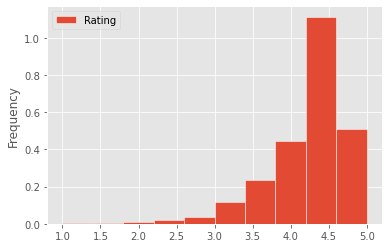

In [4]:
apps.plot(kind='hist', y='Rating', density=True, ec='w');

There certainly seems to be a lot of excellent apps out there! It would be interesting to see whether the apps with higher ratings also have more reviews. 

**Question 1.2.** What type of plot would you want to create to help you determine whether higher-rated apps also have more reviews? Assign either 1, 2, 3, or 4 to the name `plot_type` below.

1. scatter plot
2. line graph
3. bar graph
4. histogram

In [5]:
plot_type = 1

In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Now create the plot you identified above to help you determine whether higher-rated apps also have more reviews.

<!--
BEGIN QUESTION
name: q1_3
-->

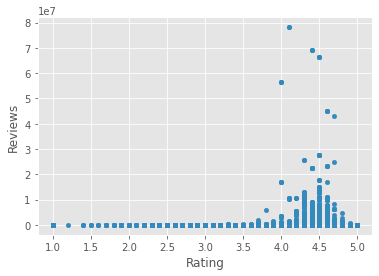

In [7]:
apps.plot(kind='scatter', x='Rating', y='Reviews');

**Question 1.4.** Which of the following can we conclude, based on this data? Assign either 1, 2, 3, or 4 to the name `plot_conclusion` below.

1. Apps with higher ratings become more popular, and since more people are using these apps, more reviews are given.
2. Apps with more reviews become more popular, and since more people are using these apps, higher ratings are given.
3. Both 1 and 2.
4. Neither 1 nor 2.

In [8]:
plot_conclusion = 4

In [9]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Assign the name `by_content` to a DataFrame which counts the number of apps per Content Rating. List the Content Ratings alphabetically.

*Hint*: To keep only certain columns in a DataFrame, call `get` with a `list` of column names you want to keep. 

In [10]:
by_content = apps.get(['App','Content Rating']).groupby('Content Rating').count()
by_content

,App
Content Rating,
Adults only 18+,3
Everyone,8702
Everyone 10+,413
Mature 17+,499
Teen,1206
Unrated,2


In [11]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** Create a DataFrame called `install_stats` which has a single column, `'Installs'`, that contains the mean number of Installs for each type of Content Rating. It's okay if the answers display in scientific notation.

In [12]:
install_stats = apps.get(['Content Rating', 'Installs']).groupby('Content Rating').mean()
install_stats

,Installs
Content Rating,
Adults only 18+,6.666667e+05
Everyone,1.311844e+07
Everyone 10+,3.204330e+07
Mature 17+,1.107112e+07
Teen,2.878636e+07
Unrated,2.525000e+04


In [13]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** Create a DataFrame called `top_communication_apps_by_content_rating` that contains, for each unique Content Rating, the number of apps satisfying both of these conditions:
- Category is `'COMMUNICATION'`. 
- Rating is between 4 and 5 (inclusive).

The structure of `top_communication_apps_by_content_rating` should be as follows:
- It should have just one column, `'Top_Comm_Apps'`.
- It should be sorted by `'Top_Comm_Apps'` in decreasing order.

*Hint:* You can do this however you'd like, but one way to proceed is to first create a single DataFrame that contains only the rows matching the specified conditions, and then create a second DataFrame that results from grouping the first DataFrame.

In [14]:
comm_apps = apps[apps.get('Category') == 'COMMUNICATION']
high_rated_comm_apps = comm_apps[comm_apps.get('Rating') >= 4].sort_values('Rating', ascending=False).groupby('Content Rating').count()
top_communication_apps_by_content_rating = bpd.DataFrame().assign(Top_Comm_Apps = high_rated_comm_apps.get('App'))
top_communication_apps_by_content_rating

,Top_Comm_Apps
Content Rating,
Everyone,238
Mature 17+,8
Teen,22


In [15]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8.** Suppose a good app is one with at least one million installs and a rating of at least 4.0. Create a variable called `best_category` containing the name of the category with the most good apps.

_Note:_ Your answer should be generated using code – not by hard-coding a string! (In other words, don't write `best_category = "DATING"` if you think that's the best category).

In [16]:
best_category = apps[apps.get('Rating') >= 4.0]
best_category = apps[apps.get('Installs') >= 1000000].groupby('Category').count().sort_values('App', ascending=False).index[0]
best_category

'GAME'

In [17]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9.** Make a bar chart of the average rating by category in which the bars are sorted from smallest to largest. Your result should look like this:

<img src="data/avg_rating_sorted.png"/>

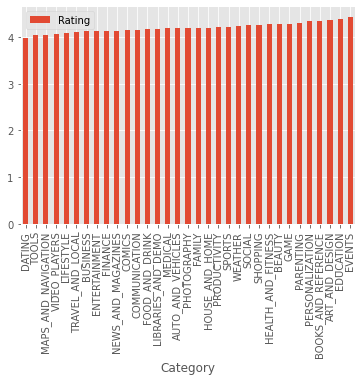

In [18]:
# YOUR CODE HERE
avg_category = apps.groupby('Category').mean().sort_values('Rating')
avg_category.plot(kind='bar', y='Rating');

## 2. Incomes of CEOs 💼

For the rest of this lab, we'll look at the 2015 compensation of Chief Executive Officers (CEOs) at the 100 largest companies in California.  The data were compiled for a Los Angeles Times analysis [here](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the US Securities and Exchange Commission from all publicly-traded companies.  Two of the companies in our dataset have two CEOs, so there are 102 CEOs in the dataset.

We've copied the data from the LA Times page into a file called `raw_compensation.csv`.  The page notes that all dollar amounts are in millions of dollars.

In [19]:
raw_compensation = bpd.read_csv('data/raw_compensation.csv').set_index('Rank')
raw_compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
Rank,,,,,,,,
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000
...,...,...,...,...,...,...,...,...
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000


We want to compute the average of the CEOs' pay. Try running the cell below. When you're done, make sure to comment it out.

In [20]:
# after running this cell to see the error, please prevent it from running again
# by placing a '#' in front of the line of code to "comment it out".

#raw_compensation.get("Total Pay").mean()

You should see an error. Let's examine why this error occured by looking at the values in the `'Total Pay'` column. 

**Question 2.1.** Use the `type` function to set `total_pay_type` to the type of the first item from the `'Total Pay'` column.

In [21]:
total_pay_type = type(raw_compensation.get('Total Pay').iloc[0])
total_pay_type

str

In [22]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** You should have found that the values in the `'Total Pay'` column are strings (text). It doesn't make sense to take the average of text values, so we need to convert them to numbers if we want to do this. Extract the first value in the `'Total Pay'` column.  It's the 2015 pay of Mark Hurd, one of the two CEOs of Oracle in 2015, in *millions* of dollars.  Call it `mark_hurd_pay_string`.

In [23]:
mark_hurd_pay_string = raw_compensation.get('Total Pay').iloc[0]
mark_hurd_pay_string

'$53.25 '

In [24]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Using code, convert `mark_hurd_pay_string` to a number of *dollars* and store the result in the variable `mark_hurd_pay`, which should be a float.  
- The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  
- You'll also need the function `float`, which converts a string that looks like a number to an actual number.  
- Last, remember that the answer should be in dollars, not millions of dollars.

In [25]:
mark_hurd_pay = float(mark_hurd_pay_string.strip('$')) * 1000000
mark_hurd_pay

53250000.0

In [26]:
grader.check("q2_3")

q2_3 results: All test cases passed!

To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times. No, thanks! 🙅

This is where functions come in.  Suppose instead of `mark_hurd_pay_string`, we had a variable called `some_pay_string`, formatted in the same way as `mark_hurd_pay_string`, with a dollar sign followed by an amount. Now that we've done it for `mark_hurd_pay_string`, we could use essentially the same code on `some_pay_string` to extract the pay as a number of dollars. You'd just need to change `mark_hurd_pay_string` in your code to `some_pay_string`.

**Question 2.4.** Inside the function below, type the word `return` (which should turn green), then copy the expression you used to compute `mark_hurd_pay`, but replace the specific `mark_hurd_pay_string` with the generic `some_pay_string`.

In [27]:
def convert_pay_string_to_number(some_pay_string):
    """Converts a pay string like '$100' (in millions) to a number of dollars."""
    # After the word return, put your code to convert some_pay_string to a number of dollars
    return float(some_pay_string.strip('$')) * 1000000

In [28]:
grader.check("q2_4")

q2_4 results: All test cases passed!

Here, we've defined a new function, giving a name to the expression that converts `'Total Pay'` strings to numeric values. This function can convert any string with the right format (like "$100") to a number representing millions of dollars. Later in this lab we'll see the payoff: we can call (use) that function on every pay string in the dataset at once.

We can call our function just like we call the built-in functions we've seen. It takes one argument, a string, and it returns a number.

In [29]:
convert_pay_string_to_number('$42')

42000000.0

In [30]:
convert_pay_string_to_number(mark_hurd_pay_string)

53250000.0

In [31]:
# We can also compute Safra Catz's pay in the same way:
convert_pay_string_to_number(raw_compensation.get('Total Pay').iloc[1])

53240000.0

What have we gained?  Well, without the function, we'd have to copy that `float(some_pay_string.strip("$")) * 1000000` stuff **each time** we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

Soon, we'll see how to apply this function to every pay string in a single expression. First, let's learn some more functions.

## 3. Defining Functions ➗

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(0.5)` should be the number 50.  (No percent sign.)

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Let's call our function `to_percentage`.
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many *arguments* your function should have, and what names you'll use to refer to those arguments in the function's code.  `to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)

We put a colon after the signature to tell Python it's over.

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so **you should write an explanation of what your function does**.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else.  First let's give a name to the number we multiply a proportion by to get a percentage.

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`. The return statement also *ends the function* and once it's called *no lines in the body after it are run*. So, we want the value of `to_percentage(0.5)` to be the proportion 0.5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor

**Question 3.1.** Define the function `to_percentage` in the cell below.  Call your function to convert the proportion `0.2` to a percentage.  Name that percentage `twenty_percent`.

In [32]:
def to_percentage(proportion):
    """ Converts a proportion to a percentage """
    return proportion * 100

In [33]:
grader.check("q3_1_1")

q3_1_1 results: All test cases passed!

In [34]:
twenty_percent = to_percentage(0.20)
twenty_percent

20.0

In [35]:
grader.check("q3_1_2")

q3_1_2 results: All test cases passed!

Like the built-in functions, you can variable names as arguments to your function.

**Question 3.2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Just like other named things, functions stick around after you define them.

In [36]:
a_proportion = 2**(0.5) / 2

In [37]:
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

In [38]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Here's an important fact about functions: the variable names assigned within a function's body are only accessible within that function's body. Once the function has returned, those names are gone. So even though you defined `factor = 100` inside `to_percentage` above and then called `to_percentage`, the variable name `factor` has no meaning outside the body of `to_percentage`.

To show you what we mean, run the following cell. **It intentionally causes an error**. When you're done, comment it out.

In [39]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.) Comment this code out
# after running it to prevent the error in the future.

#factor

If we wanted to, we could define a new variable with the name `factor` outside of the definition of `to_percentage`, and it could have any value we want.

As we've seen with the built-in functions, functions can also take strings (or arrays, or DataFrames) as arguments, and they can return those things, too.

**Question 3.3.** Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed. You can assume that `disemvowel` will only be called on lowercase strings, meaning that you only have to get rid of lowercase vowels
. (In English, the vowels are the characters "a", "e", "i", "o", and "u". We won't count "y".)

*Hint:* To remove all the "a"s from a string, you can use `that_string.replace("a", "")`.  And you can call `replace` multiple times.

In [40]:
def disemvowel(a_string):
    return a_string.replace('a', '').replace('e', '').replace('i', '').replace('o', '').replace('u', '')
    
# An example call to your function. (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("can you read this without vowels?")

'cn y rd ths wtht vwls?'

In [41]:
grader.check("q3_3")

q3_3 results: All test cases passed!

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake 🍰 telling you to follow another recipe to make the frosting, and another to make the filling.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 3.4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  The number should be the number of characters in the argument string that aren't vowels. Again, you can assume that `num_non_vowels` will only be called on lowercase strings.

*Hint:* The function `len` takes a string as its argument and returns the number of characters in it.

In [42]:
def num_non_vowels(a_string):
    """The number of characters in a string, not counting any vowels."""
    return len(disemvowel(a_string))

In [43]:
grader.check("q3_4")

q3_4 results: All test cases passed!

Functions can also encapsulate code that *does things* rather than just computing values.  For example, if you call `print` inside a function, and then call that function, something will get printed.

The `movies_by_year` dataset in the course notes has information about movie sales in recent years.  Suppose you'd like to display the year with the 5th-highest total gross movie sales, printed in a human-readable way.  You might do this:

In [44]:
movies_by_year = bpd.read_csv("data/movies_by_year.csv").set_index('Year')
rank = 5
fifth_from_top_movie_year = movies_by_year.sort_values(by='Total Gross', ascending=False).index[rank-1]

print("Year number", rank, "for total gross movie sales was", fifth_from_top_movie_year)

Year number 5 for total gross movie sales was 2010


After writing this, you realize you also wanted to print out the 2nd and 3rd-highest years.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 3.5.** Write a function called `print_kth_top_movie_year`.  It should take a single argument, the rank of the year (like 2, 3, or 5 in the above examples).  It should print out a message like the one above.  It shouldn't have a `return` statement, because we want the function to print, not return.

In [45]:
def print_kth_top_movie_year(k):
    print("Year number", k, "for total gross move sales was", movies_by_year.sort_values(by='Total Gross', ascending=False).index[k-1])

In [46]:
# Example calls to your function:
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)

Year number 2 for total gross move sales was 2013
Year number 3 for total gross move sales was 2012


## 4. Applying Functions 🩹

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the string `"hey"`!

For example, we can make a new name for the built-in function `max` if we want:

In [47]:
the_largest_of = max
the_largest_of(2, 6)

6

The old name for `max` is still around:

In [48]:
max(2, 6)

6

Try just writing `max` or `the_largest_of` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [49]:
max

<function max>

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [50]:
np.array([max, np.average, type])

array([<built-in function max>, <function average at 0x7f30c476f160>,
       <class 'type'>], dtype=object)

**Question 4.1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`.

In [51]:
some_functions = np.array([len, help, type])
some_functions

array([<built-in function len>,
       Type help() for interactive help, or help(object) for help about object.,
       <class 'type'>], dtype=object)

In [52]:
grader.check("q4_1")

q4_1 results: All test cases passed!

Working with functions as values can lead to some funny-looking code.  For example, see if you can figure out why this works:

In [53]:
np.array([max, np.average, type])[0](4, -2, 7)

7

Here's a simpler example that's actually useful: the Series method `apply`.
`apply` calls a function many times, once on *each* element of a Series, which typically comes from a column of a DataFrame. It produces a Series of the results, which we may want to then add to a DataFrame.

Here's an example. Remember that the `'Total Pay'` column of the `raw_compensation` DataFrame contained strings:

In [54]:
raw_compensation.get("Total Pay")

Rank
1      $53.25 
2      $53.24 
3      $44.91 
4      $35.98 
5      $33.36 
        ...   
98      $0.94 
99      $0.81 
100     $0.07 
101     $0.04 
102     $0.00 
Name: Total Pay, Length: 102, dtype: object

We wrote a function, `convert_pay_string_to_number`, that converts one of these strings to a number.
Here we use `apply` to convert every CEO's pay to a number, using the function you defined:

Here's an illustration of what that did:

<img src="data/apply.png" width=700/>

Note that we didn't write something like `convert_pay_string_to_number()` or `convert_pay_string_to_number("Total Pay")`.  The job of `apply` is to call the function we give it, so instead of calling `convert_pay_string_to_number` ourselves, we just write its name as an argument to `apply`.

**Question 4.2.** Using `apply`, make a DataFrame that's a copy of `raw_compensation` with one more column called `'Total_Pay_Dollars'`.  It should be the result of applying `convert_pay_string_to_number` to the `'Total Pay'` column, as we did above.  Call the new DataFrame `compensation`.

In [55]:
compensation = raw_compensation.assign(Total_Pay_Dollars = raw_compensation.get('Total Pay').apply(convert_pay_string_to_number))
compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total_Pay_Dollars
Rank,,,,,,,,,
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00000,53250000.0
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00000,53240000.0
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,44910000.0
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,35980000.0
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,33360000.0
...,...,...,...,...,...,...,...,...,...
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000.0
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000.0
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000,70000.0


In [56]:
grader.check("q4_2")

q4_2 results: All test cases passed!

Now that we have the pay in numbers, we can perform arithmetic operations (and, as a result, compute numerical summaries) on the pay values.

**Question 4.3.** Compute the average total pay of the CEOs in the dataset.

In [57]:
average_total_pay = compensation.get('Total_Pay_Dollars').mean()
average_total_pay

11445294.11764706

In [58]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Companies pay executives in a variety of ways: directly in cash; by granting stock or other "equity" in the company; or with ancillary benefits (like private jets ✈️).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be a Series.)

In [59]:
cash_proportion = compensation.get('Cash Pay').apply(convert_pay_string_to_number) / compensation.get('Total_Pay_Dollars')
cash_proportion

Rank
1      0.017840
2      0.017844
3      0.554220
4      0.027793
5      0.139388
         ...   
98     0.989362
99     0.876543
100    0.000000
101    1.000000
102         NaN
Length: 102, dtype: float64

In [60]:
grader.check("q4_4")

q4_4 results: All test cases passed!

Look closely at the result. The last line has a strange-looking value, `NaN`. `NaN` stands for "not a number".

<img width=500 src="data/nan.png"/>

Let's look at the last few lines of the DataFrame:

In [61]:
compensation.take(np.arange(-5, 0))

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total_Pay_Dollars
Rank,,,,,,,,,
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000.0
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000.0
100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63000,70000.0
101,Elon R. Musk,Tesla Motors (Palo Alto),$0.04,6%,$0.04,$0.00,$0.00,0.46000,40000.0
102,Lawrence Page***,Alphabet (Mountain View),$0.00,0%,$0.00,$0.00,$0.00,0.00001,0.0


Notice anything strange? 

**Question 4.5.** Why did we get the `NaN`?  Assign either 1, 2, 3, or 4 to the name `apply_part5` below. 
1. The proportion would be 0.  Python can only calculate nonzero numbers.
2. The `'Ratio of CEO pay to average industry worker pay'` rounds to 0, which Python does not know how to handle.
3. The calculation is dividing by 0, so the result isn't a number.

In [62]:
apply_part5 = 3

In [63]:
grader.check("q4_5")

q4_5 results: All test cases passed!

A lot of real data is messy.  It might contain zeros, empty values, or `NaN`'s (not-a-number) that we need to watch out for when performing calculations! 

Alright, back to our CEOs.  Check out the `'% Change'` column in `compensation`.  It shows the percentage increase in the CEO's pay from the previous year.  For CEOs with no previous year on record, it instead says `'(No previous year)'`.  The values in this column are *strings*, not numbers, so like the `'Total Pay'` column, it's not usable without a bit of extra work.

Given your current pay and the percentage increase from the previous year, you can compute your previous year's pay. This year's pay and last year's pay are related by the formula:

$$\text{this year's pay} = \text{last year's pay} \cdot \left(1+\dfrac{\text{percent increase}}{100}\right)$$

For example, if you made \$600 last year and your pay increased by 50\%, then 

$$\begin{align}
\text{this year's pay} &= \text{600} \cdot \left(1+\dfrac{\text{50}}{100}\right)\\
&= \text{600} \cdot (1.5) \\
&= 900
\end{align}$$

Since we know how this year's pay and last year's pay are mathematically related, we can solve this equation for last year's pay to give a formula for the previous year's pay if we know the current year's pay and the percent increase from the previous year to the current year. Doing some algebra, we find:

$$\text{last year's pay} = \dfrac{\text{this year's pay}}{\left(1+\dfrac{\text{percent increase}}{100}\right)}$$

**Question 4.6.** Create a new DataFrame called `with_previous_compensation`.  It should be a copy of `compensation`, but with the `'(No previous year)'` CEOs filtered out, and with an extra column called `'Previous_Total_Pay'`.  That column should have each CEO's pay in 2014.

*Hint 1:* This question takes several steps, but each one involves something you've already learned how to do.  Take it one step at a time, using as many lines as you need.  You can print out your results after each step to make sure you're on the right track.

*Hint 2:* You'll need to define a function to convert percentage strings, like `'-15%'`, to numbers.  You can do that just above your other code.

*Hint 3:* If you see an error saying `unsupported operand type(s) for +: 'int' and 'Series'`, try switching the order of your operation. Instead of writing something like `1 + series`, write `series + 1`.

*Note:* Don't use the `~` symbol anywhere inside your code, or the Gradescope autograder may not be able to grade your work.

In [64]:
# You can write code to perform intermediate steps here!
def strip_percentage(percentage):
    return float(percentage.strip('%'))


with_previous_compensation = compensation[compensation.get('% Change') != '(No previous year)']
stripped_percent = with_previous_compensation.get('% Change').apply(strip_percentage)
previous_total = with_previous_compensation.get('Total_Pay_Dollars') / ((stripped_percent / 100) + 1)
with_previous_compensation = with_previous_compensation.assign(Previous_Total_Pay = previous_total)
with_previous_compensation

,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total_Pay_Dollars,Previous_Total_Pay
Rank,,,,,,,,,,
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00000,44910000.0,4.629897e+07
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00000,35980000.0,4.232941e+07
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00000,33360000.0,3.971429e+07
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222.00000,24840000.0,2.587500e+07
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183.00000,22040000.0,2.592941e+07
...,...,...,...,...,...,...,...,...,...,...
97,David G. Hirz,Smartæ& Final Stores (Commerce),$1.53,-66%,$1.50,$0.00,$0.04,26.00000,1530000.0,4.500000e+06
98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00000,940000.0,1.056180e+06
99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00000,810000.0,8.709677e+05


In [65]:
grader.check("q4_6")

q4_6 results: All test cases passed!

**Question 4.7.** What was the average pay of these CEOs in 2014?

In [66]:
average_pay_2014 = with_previous_compensation.get('Previous_Total_Pay').mean()
average_pay_2014

11649176.115603432

In [67]:
grader.check("q4_7")

q4_7 results: All test cases passed!

## 5. Distribution of Wealth 💰
Earlier, we computed the average pay among the CEOs in our 102-CEO dataset.  The average doesn't tell us everything about the amounts CEOs are paid, though.  Maybe just a few CEOs make the bulk of the money, even among these 102.

We can use a *histogram* to display more information about a set of numbers.  [Here's an example](https://notes.dsc10.com/03-visualization/intro.html#histograms) of the code that we'll use to create histograms. 

**Question 5.1.** Make a histogram of the pay of the CEOs in `compensation`. 

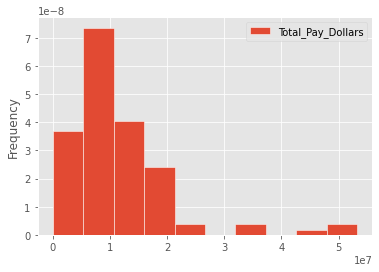

In [68]:
# Place your code here
compensation.plot(kind='hist', y='Total_Pay_Dollars', ec='w', density=True);

**Question 5.2.** Looking at the histogram, about how many CEOs made more than \$30 million? Make a good guess. (Answer the question by filling in your answer manually.  You'll have to do a bit of arithmetic; feel free to use Python as a calculator.)

In [69]:
print((0.2*0.5+0.1*0.5+0.2*0.5) * 19)
num_ceos_more_than_30_million = 5

4.75


In [70]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** Answer the same question with code. That is, find the number of CEOs with a total pay of over \$30 million using code, and assign the result to the name `num_ceos_more_than_30_million_code`.

In [71]:
num_ceos_more_than_30_million_code = compensation[compensation.get('Total_Pay_Dollars') > 30000000].shape[0]
num_ceos_more_than_30_million_code

5

In [72]:
grader.check("q5_3")

q5_3 results: All test cases passed!

Run the next cell if you want to see how far off you were.

In [73]:
percent_diff = abs(num_ceos_more_than_30_million - num_ceos_more_than_30_million_code) / num_ceos_more_than_30_million_code
print(f"Your guess was only {percent_diff * 100}% off!")

Your guess was only 0.0% off!


# Finish Line

Congratulations! You are done with Lab 3.

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [74]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()

q1_2 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q3_1_1 results: All test cases passed!

q3_1_2 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q4_5 results: All test cases passed!

q4_6 results: All test cases passed!

q4_7 results: All test cases passed!

q5_2 results: All test cases passed!

q5_3 results: All test cases passed!